In [ ]:
try:
    import yfinance as yf
except:
    !pip install yfinance
    import yfinance as yf

try:
    import pandas_ta as ta
except:
    !pip install pandas_ta
    import pandas_ta as ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218921 sha256=fdd72d9e1f5b3d2f4ef03fc15994139d54886ad601b5bd01b93be9e84cd8fcc4
  Stored in directory: /root/.cache/pip/wheels/1e/5c/47/759b32beb377aee150eb4c1f1b2b7635032cc19ea09ce076fd
Successfully built pandas_ta


# Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

In [ ]:
plt.rcParams["figure.figsize"] = (18, 3)
plt.rcParams["font.size"] = '12'

# Data loading

In [ ]:
data = yf.download(tickers='TSLA', start='2015-01-01', end='2020-01-01')
data.head(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,14.858000,14.883333,14.217333,14.620667,14.620667,71466000
2015-01-05,14.303333,14.433333,13.810667,14.006000,14.006000,80527500
2015-01-06,14.004000,14.280000,13.614000,14.085333,14.085333,93928500
2015-01-07,14.223333,14.318667,13.985333,14.063333,14.063333,44526000
2015-01-08,14.187333,14.253333,14.000667,14.041333,14.041333,51637500
2015-01-09,13.928000,13.998667,13.664000,13.777333,13.777333,70024500
2015-01-12,13.536667,13.631333,13.283333,13.480667,13.480667,89254500
2015-01-13,13.554667,13.840667,13.394000,13.616667,13.616667,67159500
2015-01-14,12.388667,13.013333,12.333333,12.846000,12.846000,173278500


In [ ]:
len(data)

1258

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2015-01-02 to 2019-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj Close  1258 non-null   float64
 5   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


In [ ]:
diff_in_days = (data.index[1:] - data.index[0:-1]).days

In [ ]:
diff_in_days.value_counts()

1    984
3    228
4     33
2     12
Name: Date, dtype: int64

# Functions

In [ ]:
def plot_results(stock_obj, y_train_pred, y_val_pred, y_test_pred):
  plt.plot(stock_obj.dates, stock_obj.y, 'k', label='True')
  plt.plot(stock_obj.dates_train, y_train_pred, label='Predicted train')
  plt.plot(stock_obj.dates_val, y_val_pred, label='Predicted val')
  plt.plot(stock_obj.dates_test, y_test_pred, label='Predicted test')
  #plt.title(f'RMSE for validation set: {mean_squared_error(y_val, y_val_pred)}')
  m1 = np.sqrt(mean_squared_error(stock_obj.y_train, y_train_pred))
  m2 = np.sqrt(mean_squared_error(stock_obj.y_val, y_val_pred))
  m3 = np.sqrt(mean_squared_error(stock_obj.y_test, y_test_pred))
  plt.title(f'RMSE for train set: {m1}\nRMSE for val set: {m2}\nRMSE for test set: {m3}')
  plt.xlabel('Date')
  plt.ylabel('Close price')
  plt.legend()
  plt.show()

# Baseline - predict previous value

In [ ]:
data_1 = data.copy()
data_1['Predict'] = data['Close'].shift(1)
data_1.dropna(inplace=True)
y = data_1['Close']
y_pred = data_1['Predict']
dates = data_1.index

In [ ]:
test=0.1
val=0.1
for_test = int(len(y) * test)
for_val = int(len(y) * val)
to_train = len(y) - for_test - for_val
y_train, y_val, y_test = y[:to_train], y[to_train:to_train+for_val], y[to_train+for_val:]
y_train_pred, y_val_pred, y_test_pred = y_pred[:to_train], y_pred[to_train:to_train+for_val], y_pred[to_train+for_val:]
dates_train, dates_val, dates_test = dates[:to_train], dates[to_train:to_train+for_val], dates[to_train+for_val:]

In [ ]:
print(len(dates_train))
print(len(dates_val))
print(len(dates_test))

1007
125
125


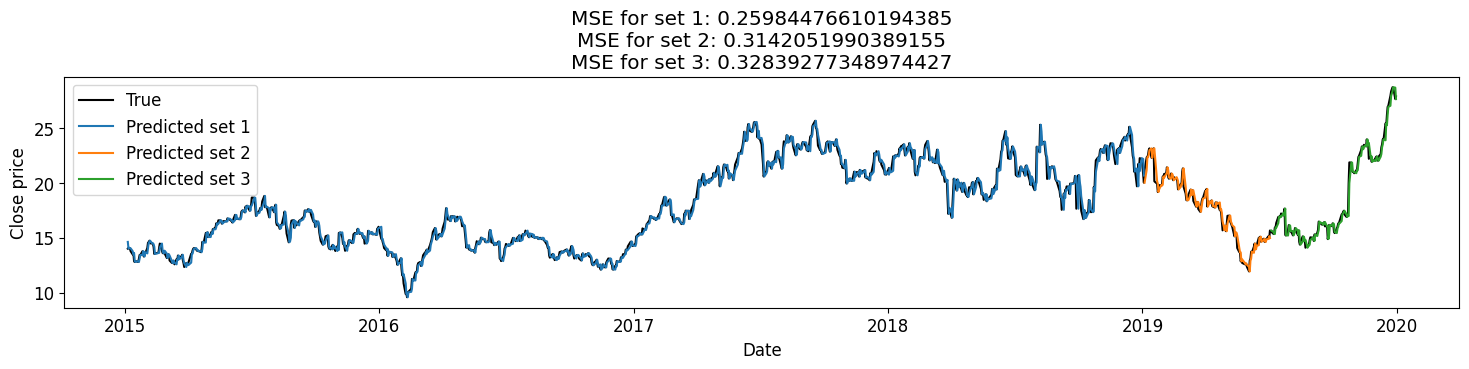

In [ ]:
plt.plot(dates, y, 'k', label='True')
plt.plot(dates_train, y_train_pred, label='Predicted set 1')
plt.plot(dates_val, y_val_pred, label='Predicted set 2')
plt.plot(dates_test, y_test_pred, label='Predicted set 3')
m1 = mean_squared_error(y_train, y_train_pred)
m2 = mean_squared_error(y_val, y_val_pred)
m3 = mean_squared_error(y_test, y_test_pred)
plt.title(f'MSE for set 1: {m1}\nMSE for set 2: {m2}\nMSE for set 3: {m3}')
plt.xlabel('Date')
plt.ylabel('Close price')
plt.legend()
plt.show()

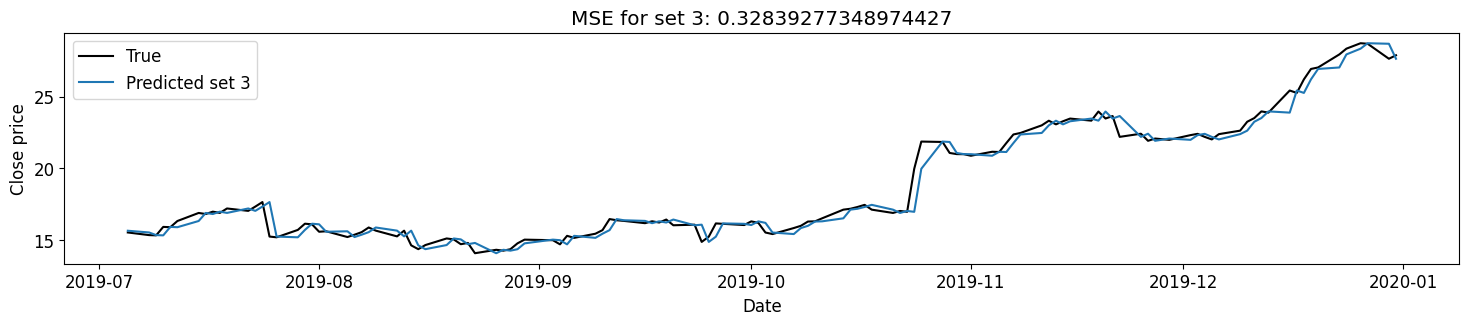

In [ ]:
plt.plot(dates_test, y[-len(dates_test):], 'k', label='True')
plt.plot(dates_test, y_test_pred, label='Predicted set 3')
plt.title(f'MSE for set 3: {m3}')
plt.xlabel('Date')
plt.ylabel('Close price')
plt.legend()
plt.show()